In [88]:
def plot_growth_curve(time, rpm_150, group, member, legend_1, legend_2, x_label, y_label):
    rpm_150_np = np.array(rpm_150)
#     rpm_230_np = np.array(rpm_230)
#     df1 = pd.DataFrame(rpm_150_np,
#                    index=time,
#                    columns=[legend_1])
#     df2 = pd.DataFrame(rpm_230_np,
#                    index=time,
#                    columns=[legend_2])
#     df_result = df1.join(df2)
    
    # 
    
    slope_1, y_intercept_1 = np.polyfit(time,rpm_150_np,1) # m*x + b, m과 b를 return함
    print("np.polyfit(time,rpm_150_np,1): ", np.polyfit(time,rpm_150_np,1))
#     print("coef_1: ", coef_1)
    poly1d_fn_1 = np.poly1d([slope_1, y_intercept_1]) 
    
    
#     slope_2, y_intercept_2 = np.polyfit(time,rpm_230_np,1)
    # print("np.polyfit(time,rpm_230_np,1): ", np.polyfit(time,rpm_230_np,1))
#     poly1d_fn_2 = np.poly1d([slope_2, y_intercept_2])
    
    f1 = plt.figure(figsize=(12, 11))

    plt.plot(time, rpm_150,  color='black', marker='o',\
         linestyle=' ',  linewidth=2, markersize=12,  alpha=.5)
    plt.plot(time,rpm_150_np, 'ko', time, poly1d_fn_1(time), '-k')
#     plt.plot(time, rpm_230,  color='black', marker='x',\
#          linestyle=' ',  linewidth=2, markersize=12,  alpha=.5)
#     plt.plot(time,rpm_230_np, 'ko', time, poly1d_fn_2(time), '-k')
    
    plt.title("Bradford Assay of WCL [group "+group+"]-"+member)
    plt.rc('font', size=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    y1 = np.array(slope_1)*time + np.array(y_intercept_1)
#     y2 = np.array(slope_2)*x_axis_scale + np.array(y_intercept_2)
    
    R_squared_value_1 = r2_score(y1, rpm_150)
#     print(R_squared_value_1)
#     R_squared_value_2 = r2_score(y2, rpm_230)
    
    plt.text(0.25, 0.25, "R squred value-1st: {:1.4f}".format(R_squared_value_1), fontsize=15)
    plt.text(0.25, 0.235, "y={:1.4f}x+({:1.4f})".format(slope_1, y_intercept_1), fontsize=15)
#     plt.text(4, 0.15, "(R squred value-2nd: {:1.4f})".format(R_squared_value_2), fontsize=20)
    
    txt="Figure 1. Lorem Ipsum is simply dummy text of the printing and typesetting industry."
    plt.text(.25, -0.05, txt, ha='center', size=15)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    plt.legend([legend_1])
    plt.show()
    
    return slope_1, y_intercept_1

np.polyfit(time,rpm_150_np,1):  [ 0.62925003 -0.00214866]


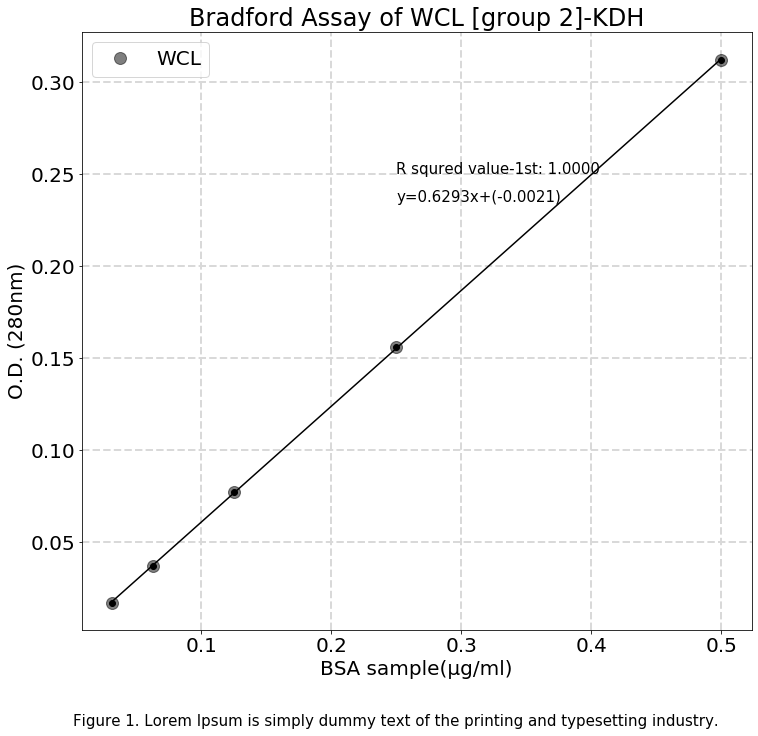

R squared value_1: 1.0000


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

if __name__ == "__main__":    
    x_axis_scale = [0.0315,0.0625,0.125,0.25, 0.5]
    
    DATA_1 = [0.017, 0.037, 0.077, 0.156, 0.312]
    member = "KDH"
    
    slope_1, y_intercept_1 = plot_growth_curve(x_axis_scale, DATA_1, "2", member, "WCL", "0(μg/ml)", "BSA sample(μg/ml)", "O.D. (280nm)")
    
    y1 = np.array(slope_1)*x_axis_scale + np.array(y_intercept_1)
#     y2 = np.array(slope_2)*x_axis_scale + np.array(y_intercept_2)
    
    R_squared_value_1 = r2_score(y1, DATA_1)
#     R_squared_value_2 = r2_score(y2, DATA_2)
    print("R squared value_1: {:1.4f}".format(R_squared_value_1))
#     print("R squared value_2: {:1.4f}".format(R_squared_value_2))